# Main Plotting of liftetime exposure for water scarcity -- remake
For water scarcity
Main script for plotting, does analysis based on script

In [1]:
import os
import xarray as xr
import pickle as pk
import time
import matplotlib as mpl
import matplotlib.colors as colors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

from settings import *
from load_manip import *
from exposure import * 
from utils import *
from main_function import *

# Script to plot countries
from plotting import *

# set own plotting parameters
set_plot_param()
map_proj = ccrs.Robinson(central_longitude=0, globe=None)

%matplotlib inline 

In [2]:
print(xr.__file__)

/data/brussel/100/vsc10055/miniconda3/envs/env_waterscarcity/lib/python3.11/site-packages/xarray/__init__.py


In [3]:
# extreme event
global flags

flags = {}
flags['extr'] = 'waterdeficit'   # 0: all
                                  # 2: cropfailedarea
                                  # 3: waterscarcity
                                  # 4: falkenmark 
                                  # 5: water deficit
flags['mode'] = 'exposure'   # whether to calculate exposure, duration, intensity or all. 

flags['runs'] = 0           # 0: do not process ISIMIP runs (i.e. load runs pickle)
                            # 1: process ISIMIP runs (i.e. produce and save runs as pickle)
flags['mask'] = 0           # 0: do not process country data (i.e. load masks pickle)
                            # 1: process country data (i.e. produce and save masks as pickle)
flags['exposure'] = 0     # 0: do not process ISIMIP runs to compute exposure (i.e. load exposure pickle)
                            # 1: process ISIMIP runs to compute exposure (i.e. produce and save exposure as pickle)
flags['exposure_pic'] = 0   # 0: do not process ISIMIP runs to compute picontrol exposure (i.e. load exposure pickle)
                            # 1: process ISIMIP runs to compute picontrol exposure (i.e. produce and save exposure as pickle)
flags['expectancy'] = 0     # 0: Load varying life expectancies
                            # 1: Constant life expectancies at 1960 levels

    
flag_region = 'world'    
regions = ['East Asia & Pacific', 'Europe & Central Asia', 'Latin America & Caribbean', 'Middle East & North Africa', 'North America', 'South Asia', 'Sub-Saharan Africa']

regions_abbrevs = {'world': ['EASP','EUCA','LAMC','MENA','NAM','SAS','SSA']}

BE_colors = ['gold','darkorange','crimson', 'maroon', 'purple']

labels = ['A','B','C','D','E','F','G','H','F']


#cohort_classes       = [[0,4],[5,9],[10,14],[15,19],[20,24],[25,29],[30,34],[35,39],[40,44],[45,49],[50,54],[55,59],[60]]
#cohort_classes_label = np.arange(0,65,5)


### Load and manipulate  files for plotting

TO DO - delete what is not used

In [4]:
# load country borders (from pickles)

d_countries = pd.read_pickle(open('./data/pickles/country_info.pkl', 'rb'))
df_countries = d_countries['info_pop']

# unpack country information
gdf_country_borders = d_countries['borders']

# load cohort info
d_regions = pd.read_pickle(open('./data/pickles/region_info.pkl', 'rb'))


/data/brussel/100/vsc10055/miniconda3/envs/env_waterscarcity/lib/python3.11/pickle.py:1718: UserWarning: Unpickling a shapely <2.0 geometry object. Please save the pickle again as this compatibility may be removed in a future version of shapely.
  setstate(state)
/data/brussel/100/vsc10055/miniconda3/envs/env_waterscarcity/lib/python3.11/pickle.py:1718: UserWarning: Unpickling a shapely <2.0 geometry object. Please save the pickle again as this compatibility may be removed in a future version of shapely.
  setstate(state)


## Load water deficit values and get cohort size per country

In [5]:
# Load water deficit values 
ds_pct_waterdeficit, ds_pct_waterdeficit_perregion, a, b = calc_lifetime_waterdeficit(flags)


Loading processed country and region data


/data/brussel/100/vsc10055/miniconda3/envs/env_waterscarcity/lib/python3.11/pickle.py:1718: UserWarning: Unpickling a shapely <2.0 geometry object. Please save the pickle again as this compatibility may be removed in a future version of shapely.
  setstate(state)
/data/brussel/100/vsc10055/miniconda3/envs/env_waterscarcity/lib/python3.11/pickle.py:1718: UserWarning: Unpickling a shapely <2.0 geometry object. Please save the pickle again as this compatibility may be removed in a future version of shapely.
  setstate(state)


Loading processed isimip data
Loading processed exposures


/data/brussel/100/vsc10055/miniconda3/envs/env_waterscarcity/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/data/brussel/100/vsc10055/miniconda3/envs/env_waterscarcity/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1620: RuntimeWarning: All-NaN slice encountered
  return fnb._ureduce(a,
/data/brussel/100/vsc10055/miniconda3/envs/env_waterscarcity/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/data/brussel/100/vsc10055/miniconda3/envs/env_waterscarcity/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1620: RuntimeWarning: All-NaN slice encountered
  return fnb._ureduce(a,
/data/brussel/100/vsc10055/miniconda3/envs/env_waterscarcity/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1620: 

Loading processed country and region data


/data/brussel/100/vsc10055/miniconda3/envs/env_waterscarcity/lib/python3.11/pickle.py:1718: UserWarning: Unpickling a shapely <2.0 geometry object. Please save the pickle again as this compatibility may be removed in a future version of shapely.
  setstate(state)
/data/brussel/100/vsc10055/miniconda3/envs/env_waterscarcity/lib/python3.11/pickle.py:1718: UserWarning: Unpickling a shapely <2.0 geometry object. Please save the pickle again as this compatibility may be removed in a future version of shapely.
  setstate(state)


Loading processed isimip data
Loading processed exposures


/data/brussel/100/vsc10055/miniconda3/envs/env_waterscarcity/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/data/brussel/100/vsc10055/miniconda3/envs/env_waterscarcity/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1620: RuntimeWarning: All-NaN slice encountered
  return fnb._ureduce(a,
/data/brussel/100/vsc10055/miniconda3/envs/env_waterscarcity/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/data/brussel/100/vsc10055/miniconda3/envs/env_waterscarcity/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1620: RuntimeWarning: All-NaN slice encountered
  return fnb._ureduce(a,
/data/brussel/100/vsc10055/miniconda3/envs/env_waterscarcity/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1620: 

## Per 10 year grouped cohort

### Preprocess cohort distributions and totals, globally and per region

In [6]:
# get cohort size per country
data = {
    country: d_countries['cohort_size'][country].loc[2020] * 1000
    for country in d_countries['cohort_size']
}

df_cohortsize_percountry_2020 = pd.DataFrame(data)

In [7]:
# Define cohort classes and labels
cohort_classes       = [[0,9], [10,19], [20,29], [30,39], [40,49], [50,59]]
cohort_classes_label = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59']

# get the cohortsizes per birth year, per region
df_pop_perregion = get_cohortsizes_perregion()

# group the cohorts into classes (calculate sum of # people within cohorts)
df_cohort_grouped = group_cohorts_into_classes(df_pop_perregion, cohort_classes, cohort_classes_label).iloc[::-1]

# calculate share of every cohort class for every region
cohort_grouped_share = df_cohort_grouped.div(df_cohort_grouped.sum(axis=0), axis=1)

# calculate country weights based on total region population
d_country_weights = {region: df_countries[df_countries['region']==region]['population'].div(float(df_countries.groupby('region').sum().loc[region]['population'])) for region in regions}
d_country_weights['World'] = df_countries['population'] / df_countries['population'].sum()

### Barplot plotting

In [8]:
# convert data array into dataframe for plotting
var = 'mmm_RCP'
df_pct_waterdeficit = pd.DataFrame(ds_pct_waterdeficit[var].values, columns = ds_pct_waterdeficit[var]['country'], index = df_cohortsize_percountry_2020.index)

var = 'lqntl_RCP'
df_pct_waterdeficit_lqntl = pd.DataFrame(ds_pct_waterdeficit[var].values, columns = ds_pct_waterdeficit[var]['country'], index = df_cohortsize_percountry_2020.index)

var = 'uqntl_RCP'
df_pct_waterdeficit_uqntl = pd.DataFrame(ds_pct_waterdeficit[var].values, columns = ds_pct_waterdeficit[var]['country'], index = df_cohortsize_percountry_2020.index)

In [9]:
# per birth year and country calculate number of people above certain lifetime water deficit threshold and then calculate weighted average per region and globally

thresholds = [50,75,90] # %
thresholds = [50,60,70,80,90] # %

d_npeople_ot = {}

d_cohortsize_percountry_overthreshold = {}

for threshold in thresholds:

    df_cohortsize_percountry_overthreshold = df_cohortsize_percountry_2020.where(df_pct_waterdeficit > threshold)
    
    d_cohortsize_percountry_overthreshold[threshold] = df_cohortsize_percountry_overthreshold

    df_npeople_ot_perbirthyear = pd.DataFrame()
    
    # group the countries by region
    for region in regions: 

        countries_in_region = list(df_countries[df_countries['region'] == region].index)

        # calculate the number of people with lifetime water deficit over the threshold per region (based on country average values)
        # THIS CALCULATION SHOULD BE THE WEIGHTED SUM
        # df_npeople_ot_perbirthyear[region] = (df_cohortsize_percountry_overthreshold[countries_in_region] * d_country_weights[region]).sum(axis =1)
        
        # this should not be weighted but just be summed? 
        df_npeople_ot_perbirthyear[region] = (df_cohortsize_percountry_overthreshold[countries_in_region]).sum(axis =1)
        

    # for the world, weighted based on all countries (not average per region!!!!)
    df_npeople_ot_perbirthyear['World'] =  (df_cohortsize_percountry_overthreshold * d_country_weights['World']).sum(axis =1)
    df_npeople_ot_perbirthyear['World'] =  (df_cohortsize_percountry_overthreshold).sum(axis =1)


    # group number of people per cohort 
    d_npeople_ot[threshold] = group_cohorts_into_classes(df_npeople_ot_perbirthyear, cohort_classes, cohort_classes_label).iloc[::-1]

# turn dictionary into dataset  
ds_npeople = xr.concat(
    [xr.DataArray(v).rename({'dim_0':'cohort_class','dim_1':'region'}) for v in d_npeople_ot.values()],

    dim='threshold').assign_coords({'threshold':list(d_npeople_ot.keys())})

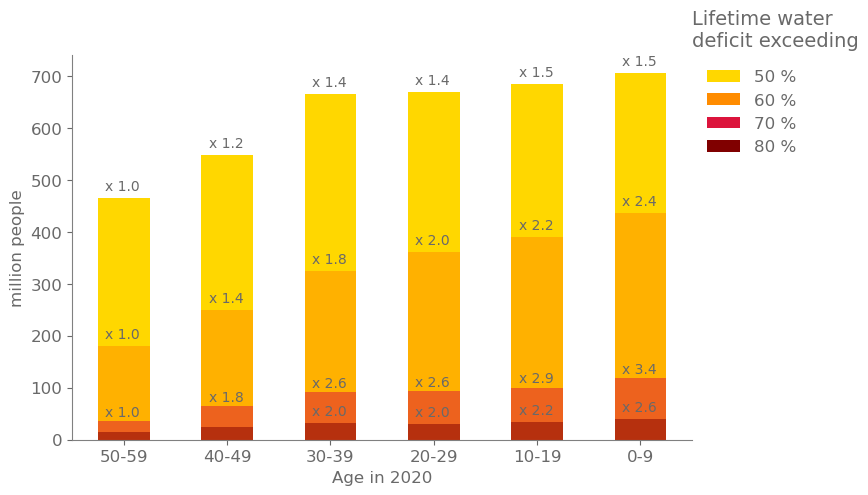

In [10]:
# million people
thresholds_to_show = [50, 60, 70, 80]

region = 'World'
# define burning ember colors

fig, ax = plt.subplots(1,1, figsize=(8,5))
ax.set_ylabel('million people')
ax.set_xlabel('Age in 2020');
#ax.set_title('Number of people per age cohort worldwide',loc='right')
ax.spines[['right', 'top']].set_visible(False)    

ax.set_title('Lifetime water\ndeficit exceeding',  y=1.0, x=1,loc='left');

# get people per threshold for region

df_toplot =  pd.DataFrame(ds_npeople.sel(region=region).values.T, index=  ds_npeople.cohort_class.values ,columns =ds_npeople.threshold.values) *1e-6

df_toplot.iloc[:,0].plot.bar(ax=ax, color=BE_colors[0], label=str(df_toplot.keys()[0])+' %', rot=0)

for n in range(1,len(thresholds_to_show)):
    df_toplot.iloc[:,n].plot.bar(ax=ax, color=BE_colors[n],  label=str(df_toplot.keys()[n])+' %', alpha=0.5, rot=0)
    
leg = ax.legend(bbox_to_anchor=(1,1), loc="upper left",frameon=False)    

for lh in leg.legend_handles: lh.set_alpha(1)


# get people multiplication factor
pmf = df_toplot/df_toplot.iloc[0,:]

n=0
for j,p in enumerate(ax.patches):
    if j < 6: 
        ax.annotate('x '+str(np.round(pmf.iloc[:,0].values,1)[j]), (p.get_x() + 0.07, p.get_height() + 15))
    elif j >= 6 and j < 12: 
        
        ax.annotate('x '+str(np.round(pmf.iloc[:,1].values,1)[j-6]), (p.get_x() + 0.07, p.get_height() + 15))
    elif j >= 12 and j < 18: 
        
        ax.annotate('x '+str(np.round(pmf.iloc[:,2].values,1)[j-12]), (p.get_x() + 0.07, p.get_height() + 10))
    elif j > 19 and j < 24: 
        
        ax.annotate('x '+str(np.round(pmf.iloc[:,3].values,1)[j-18]), (p.get_x() + 0.07, p.get_height() + 15))
        
plt.savefig('figures/barplot.png', bbox_inches='tight',dpi=600)


In [11]:
# maps of millions of people per threshold. 

from matplotlib import cm

# Create colormap and set under and bad values to white
cmap_obj = cm.get_cmap(cmap).copy()
cmap_obj.set_under('white')  # for values below the first boundary (0)
cmap_obj.set_bad('white')    # for NaNs

# settings
fig = plt.figure(figsize=(22, 9))  # adjust for 2x2 layout
map_proj = ccrs.Robinson()

bounds = [1, 1e2, 5e2, 1e3, 5e3, 1e4, 5e4, 1e5]  # adjust color levels depending on your data

norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
cmap = 'YlOrBr'
legend_label_base = "thousand people"

# thresholds to plot
thresholds = [50, 60, 70, 80]  # for example
cohort_label = '0-9'  # class to plot

for i, threshold in enumerate(thresholds):
    row = i // 2
    col = i % 2

    ax = plt.subplot2grid((2, 2), (row, col), projection=map_proj)

    # ax settings
    ax.axis('off')
    ax.coastlines(color='lightgray', linewidth=0.5)
    ax.add_feature(cfeature.BORDERS, color='white', linewidth=0.5)
    cax = ax.inset_axes((1.02, 0.1, 0.03, 0.9)); #make a color bar axis

    # data selection
    df_cohortsize_percountry_overthreshold = d_cohortsize_percountry_overthreshold[threshold]
    df_percountry_overthreshold_grouped = group_cohorts_into_classes(df_cohortsize_percountry_overthreshold, cohort_classes, cohort_classes_label) * 1e-3
    
    gdf_overthreshold = gdf_country_borders.merge(df_percountry_overthreshold_grouped.T, left_index=True, right_index=True) 
    
    # plotting
    gdf_overthreshold.plot(
        ax=ax,
        column=cohort_label,
        cmap=cmap_obj,          # updated cmap
        norm=norm,
        legend=True,
        cax=cax,
        legend_kwds={'label': legend_label_base.format(threshold), 'extend' :'max'},
        transform=ccrs.PlateCarree(),
        edgecolor='black',
        linewidth=0.3,
        missing_kwds={"color": "white"}  # for missing geometries
    )

    # titles
    ax.set_title('Lifetime water deficit exceeds {}%'.format(threshold), loc='right', size=16)
    ax.set_title(labels[i], loc='left', size=16)  # a), b), c), d)

plt.tight_layout()
plt.savefig('figures/threshold_maps.png', bbox_inches='tight',dpi=600)

plt.show()




NameError: name 'cmap' is not defined

## Values

In [16]:
# get values
pop_50pct_under60 = d_npeople_ot[50]['World'].sum()
total_pop_under60 = df_cohort_grouped['World'].sum()

pct_worldpop_50_waterdeficit = pop_50pct_under60 / total_pop_under60 *100 

print('Number of people 60 and under experiencing 50% lifetime water deficit')
print(pop_50pct_under60)
print()

print('Percent of world population')
print(pct_worldpop_50_waterdeficit)
print()

Number of people 60 and under experiencing 50% lifetime water deficit
3738689008.0

Percent of world population
55.84284628359377



In [16]:
df_toplot.loc[age_category,threshold]

np.float64(33.38342)

In [19]:
thresholds = [50, 50, 80, 80,90,90]
age_categories = ['50-59', '0-9','50-59', '0-9', '50-59', '0-9']

for threshold,age_category in zip(thresholds, age_categories):
    print(f"{df_toplot.loc[age_category,threshold]:.0f} million people aged {age_category} are expected to experience {threshold}% lifetime water deficit")
    print(f"{df_toplot.loc[age_category,threshold] / (df_cohort_grouped.loc[age_category,'World']*1e-6) * 100:.0f}% of the world cohort")
    print(" ")
    
print(f"multiplication factor 90%: {df_toplot.loc[ '0-9',90]/df_toplot.loc['50-59',90]:.1f}")

466 million people aged 50-59 are expected to experience 50% lifetime water deficit
56% of the world cohort
 
706 million people aged 0-9 are expected to experience 50% lifetime water deficit
53% of the world cohort
 
16 million people aged 50-59 are expected to experience 80% lifetime water deficit
2% of the world cohort
 
40 million people aged 0-9 are expected to experience 80% lifetime water deficit
3% of the world cohort
 
10 million people aged 50-59 are expected to experience 90% lifetime water deficit
1% of the world cohort
 
33 million people aged 0-9 are expected to experience 90% lifetime water deficit
3% of the world cohort
 
multiplication factor 90%: 3.3


In [73]:
33/10

3.3